In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(111)

var = ['X', 'Y']

labels = ['점0', '점1', '점2', '점3', '점4']

X = np.random.random_sample([5, 2]) * 10

df = pd.DataFrame(X, columns=var, index=labels)

print(df)


           X         Y
점0  6.121702  1.690698
점1  4.360590  7.692625
점2  2.953253  1.491630
점3  0.224783  4.202245
점4  2.386821  3.376562


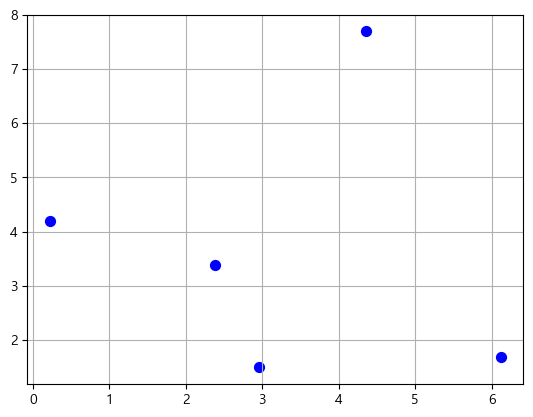

In [145]:
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=50)

plt.grid(True)

plt.show()

In [146]:
from scipy.spatial.distance import pdist, squareform

distmatrix = pdist(df, metric='euclidean') # 두 점 사이의 거리 계산

row_dist = pd.DataFrame(squareform(distmatrix), columns=labels, index=labels)

row_dist # 두 점 사이의 거리 계산 값 출력

,점0,점1,점2,점3,점4
점0,0.000000,6.254970,3.174696,6.409487,4.097740
점1,6.254970,0.000000,6.358690,5.411807,4.745963
점2,3.174696,6.358690,0.000000,3.846035,1.968201
점3,6.409487,5.411807,3.846035,0.000000,2.314338
점4,4.097740,4.745963,1.968201,2.314338,0.000000


In [147]:
full = squareform(np.arange(1, 11))

full

array([[ 0,  1,  2,  3,  4],
       [ 1,  0,  5,  6,  7],
       [ 2,  5,  0,  8,  9],
       [ 3,  6,  8,  0, 10],
       [ 4,  7,  9, 10,  0]])

In [148]:
from scipy.cluster.hierarchy import linkage # linkage() : 응집형 계층적 클러스터링 수행

row_clusters = linkage(
  distmatrix,
  method='complete' # single or complete
)
row_clusters

array([[2.        , 4.        , 1.96820089, 2.        ],
       [3.        , 5.        , 3.84603471, 3.        ],
       [0.        , 1.        , 6.25496953, 2.        ],
       [6.        , 7.        , 6.40948658, 5.        ]])

In [149]:
pd.DataFrame(
  row_clusters,
  columns=['클러스터 ID_1', '클러스터 ID_1', '거리', '클러스터 멤버 수'],
  index=['클러스터 %d' % (i+1) for i in range(row_clusters.shape[0])]
)

,클러스터 ID_1,클러스터 ID_1,거리,클러스터 멤버 수
클러스터 1,2.0,4.0,1.968201,2.0
클러스터 2,3.0,5.0,3.846035,3.0
클러스터 3,0.0,1.0,6.254970,2.0
클러스터 4,6.0,7.0,6.409487,5.0


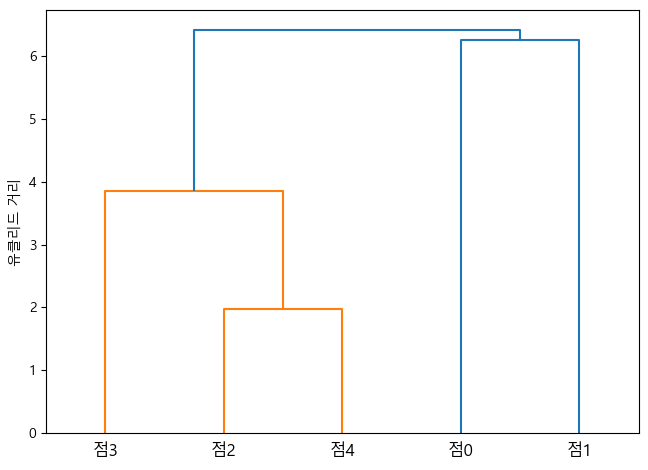

In [150]:
from scipy.cluster.hierarchy import dendrogram # dendrogram() : 클러스터의 계층 구조를 표현

row_dendrogram = dendrogram(row_clusters, labels=labels)

plt.rcParams['font.family'] = 'Malgun Gothic'

plt.tight_layout()

plt.ylabel('유클리드 거리')

plt.show()

In [151]:
from sklearn.cluster import AgglomerativeClustering
# n_clusters : 최종 클러스터 개수

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')

labels= ac.fit_predict(X)

print('클러스터 분류 결과 :', labels)

클러스터 분류 결과 : [0 0 1 1 1]


# `iris` 데이터 셋 예제

In [152]:
import statsmodels.api as sm

iris = sm.datasets.get_rdataset('iris', package='datasets')
df = iris.data
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [153]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df.Species)

df.Species = le.transform(df.Species)

df.Species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

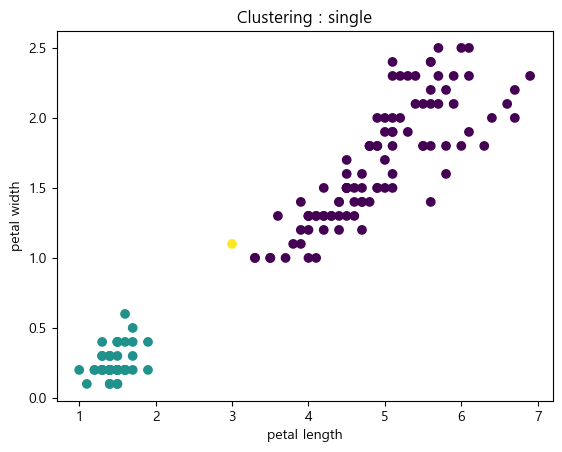

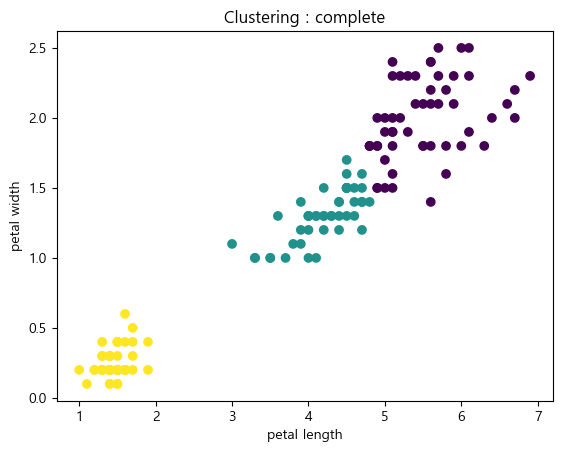

In [154]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

linkage = ['single', 'complete']

for idx, i in enumerate(linkage):
  plt.figure(idx)

  hier = AgglomerativeClustering(
    n_clusters=3,
    affinity='euclidean',
    linkage=i
  )

  hier.fit(df.iloc[:, 2:4])

  plt.scatter(
    df.iloc[:, 2],
    df.iloc[:, 3],
    c=hier.labels_
  )

  plt.title('Clustering : ' + i)

  plt.xlabel('petal length')
  plt.ylabel('petal width')

plt.show()

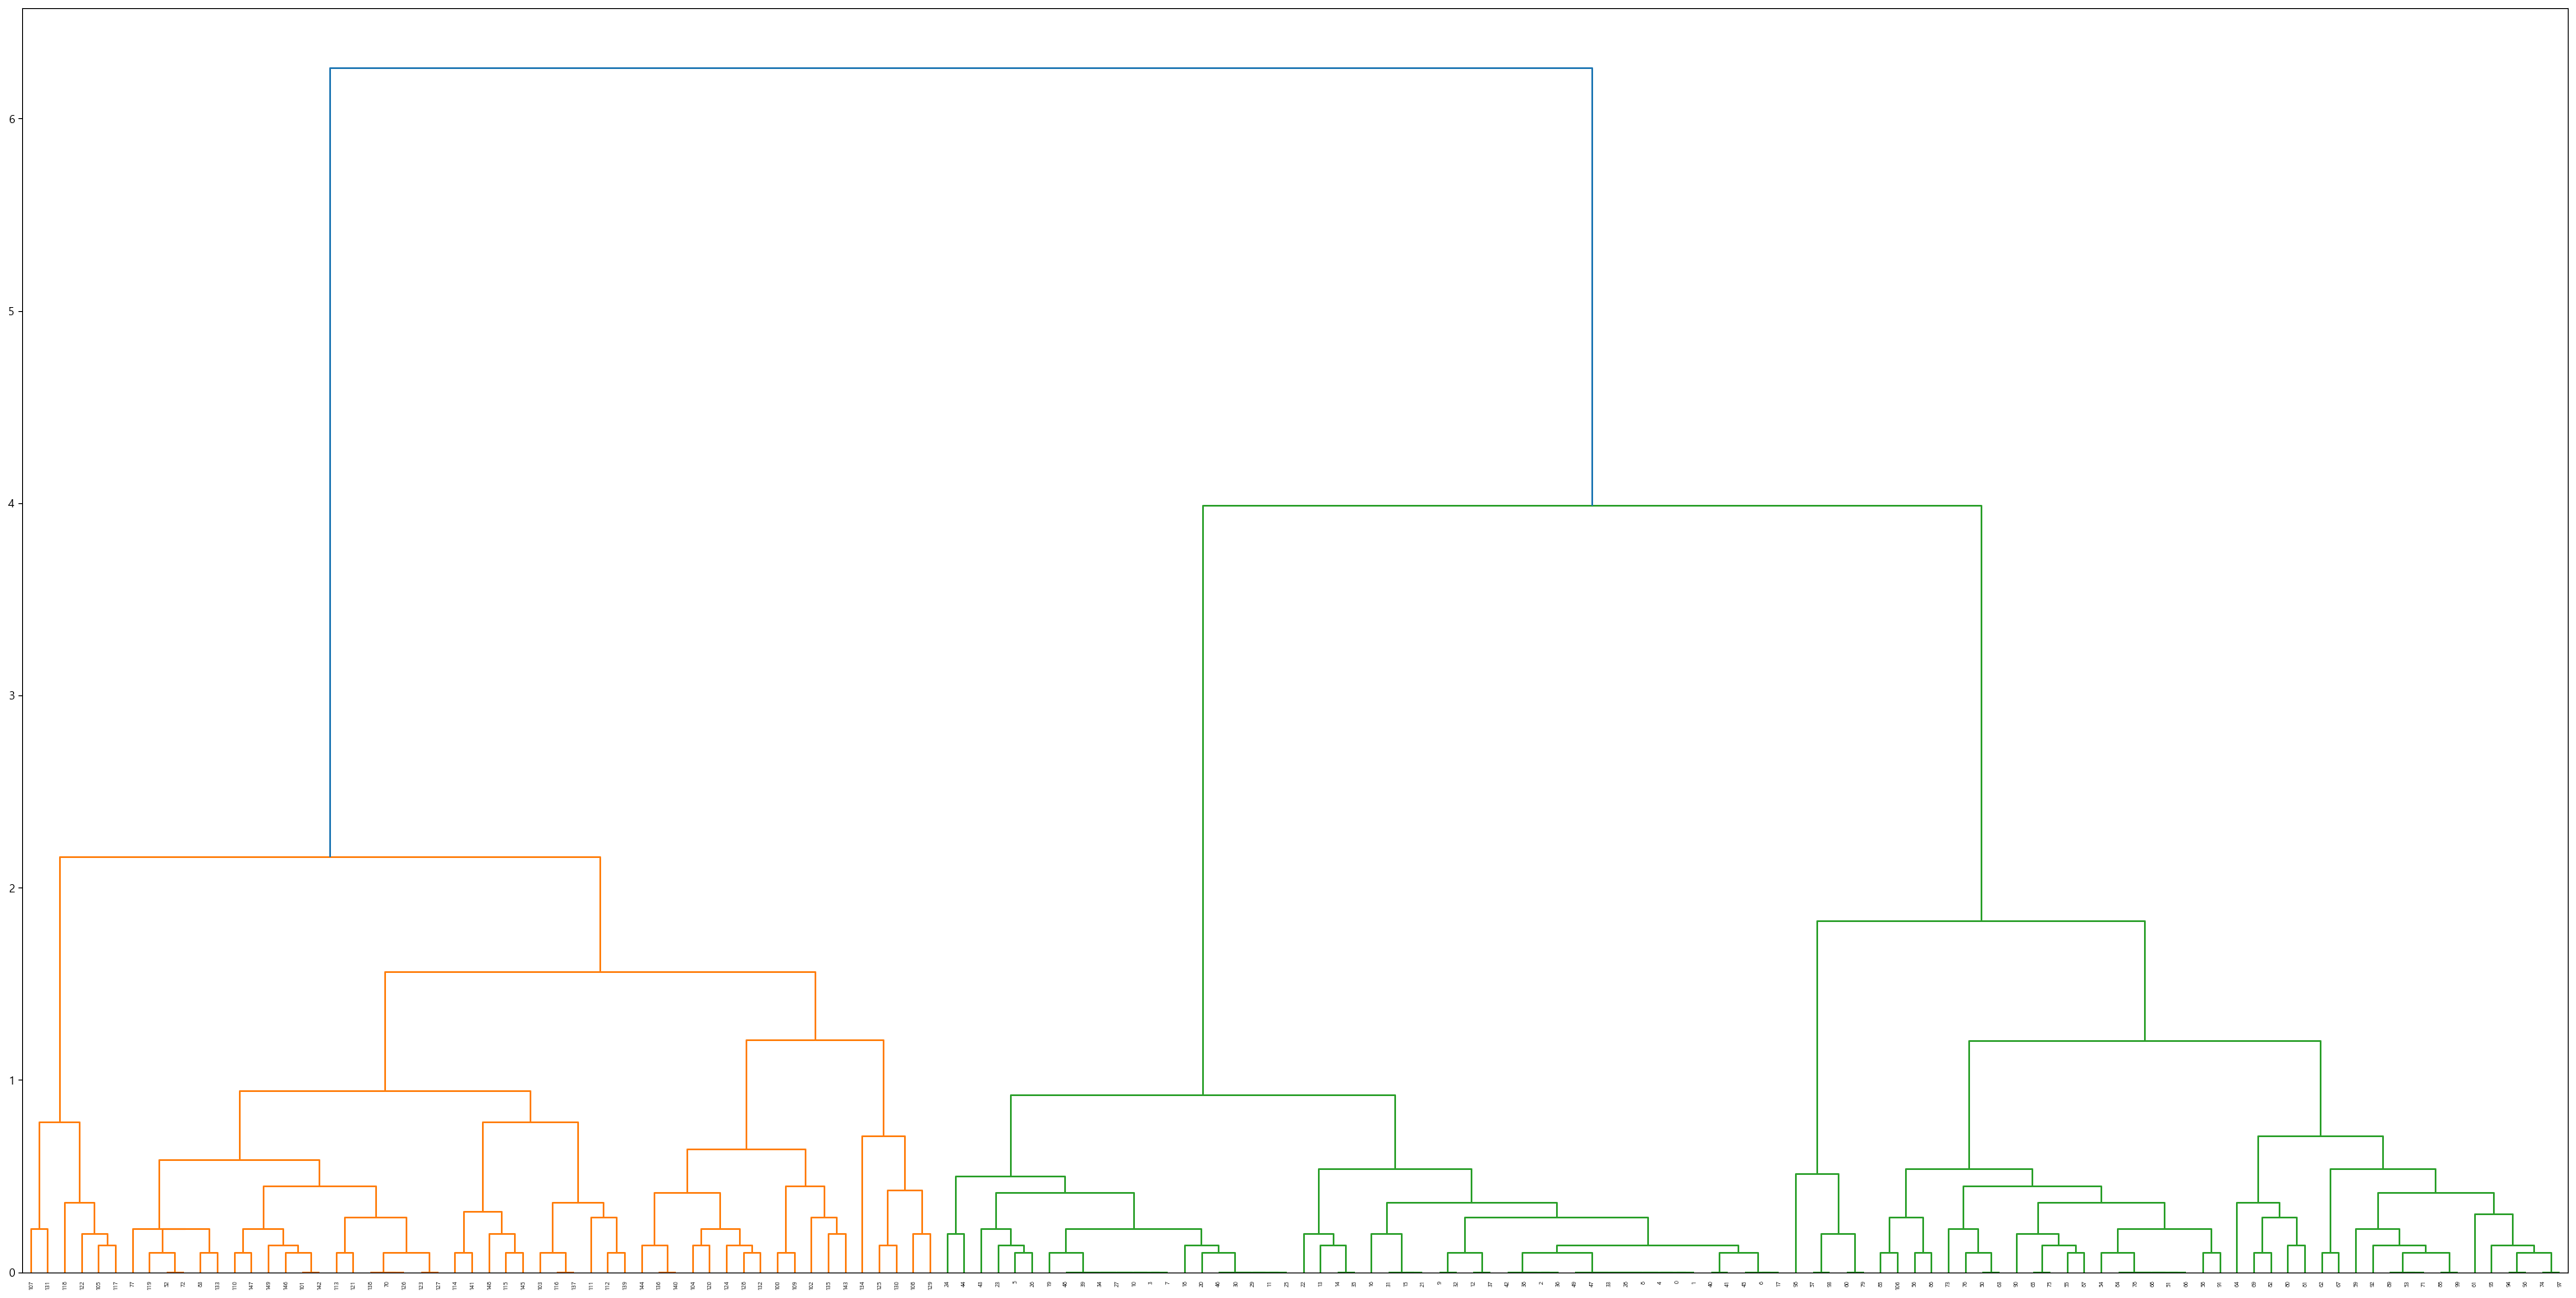

In [155]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

clustering = linkage(df.iloc[:, 2:4], method='complete')

plt.figure(figsize=(40, 20))

dendrogram(clustering)

plt.show()

In [156]:
from scipy.cluster.hierarchy import fcluster

predict = fcluster(
  clustering,
  3, # 축의 거리 값으로 3을 기준으로 끊어서 보게 되면 클러스터가 3개가 만들어진다.
  criterion='distance'
)

predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [157]:
import numpy as np

adjusted_pred = np.choose(
  (predict - 1),
  [2, 0, 1]
).astype(np.int64)

adjusted_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [158]:
pred_name = le.inverse_transform(adjusted_pred)

origin_name = le.inverse_transform(df.Species)

origin_name

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [159]:
ct = pd.crosstab(
  origin_name,
  pred_name,
  rownames=['True'],
  colnames=['Predicted'],
  margins=True
)

print(ct)
# 150개 중 versicolor 1개 틀림 / virginica 5개 틀림

Predicted   setosa  versicolor  virginica  All
True                                          
setosa          50           0          0   50
versicolor       0          45          5   50
virginica        0           1         49   50
All             50          46         54  150


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

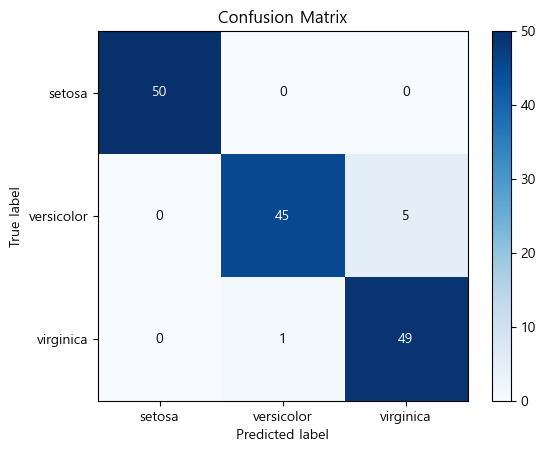

In [160]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(origin_name, pred_name)